<a href="https://colab.research.google.com/github/markbriers/data-science-jupyter/blob/main/week5_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Understanding (Week 5)

Code at: https://github.com/markbriers/data-science-jupyter

## Recap - the story so far

Our goal is to follow a data science process (CRISP-DM) to deliver a successful business outcome.

Our learning objectives are as follows:

* Describe the six stages of a data processing pipeline (using CRISP-DM)

* Demonstrate an understanding of the python programming language through the production of elementary data analysis programme

* Analyse at least three different data sources by applying at least one python data processing library to extract and explore pertinent features

* Be able to design a set of data requirements for a specified business problem

* Describe and apply (using the python programming language) the main approaches to supervised learning for a given classification problem

* Understand the use cases of Big Data technology (in particular Spark)

* Produce a report including appropriate data visualisations covering the analysis of a business problem using a data science based approach

## Exploratory Data Analysis

The field of Statistics was originally invented to allow Governments to understand properties of their _populations_ given a _sample_ of data. We should use this framing and terminology when considering the utility of a dataset in the context of the business problem.

Exploratory Data Analysis (EDA) is a statistical phrase governing the "Data Understanding and Data Preparation" parts of the CRISP-DM process. EDA involves graphical and non-graphical exploration of the data. During EDA, we will think about the following:

* Explore the quality of the data collection: Listing the data sources acquired together with their locations, the methods used to acquire them and any problems encountered
* Characterise the distribution of key attributes (for example, the target attribute of a prediction task)
* Produce a description of the data that has been acquired including its format, its quantity (for example, the number of records and fields in each table).
* Produce a description of any other surface features that have been discovered. Evaluate whether the data acquired satisfies the business requirements **(univariate analysis)**
* Characterise the relationships between pairs or small numbers of attributes **(multivariate analysis)**
* Results of simple aggregations
* Properties of significant sub-populations
* Simple statistical analyses, including missing data analysis and anomaly detection

_Structured data_ often arrives in tabular format - that is, can be readily stored and manipulated in a Pandas DataFrame object within Python. The data _fields_ are often stored as columns, and each data point is stored as a row.

_Unstructured data_ often has no discernable format. One of the initial tasks is to devise structure in order to undertake a statistical analysis. We will not cover unstructured data in this course.

### Univariate analysis - Categorical data

Let's regenerate the dataframe from last week (including mode imputation). First, we will load the data, extract the Categorical data, and complete the missing data.

In [1]:
import pandas as pd
import numpy as np
import copy

df_flights = pd.read_csv('https://raw.githubusercontent.com/ismayc/pnwflights14/master/data/flights.csv')

df_flights['carrier'] = pd.Categorical(df_flights['carrier'])
df_flights['tailnum'] = pd.Categorical(df_flights['tailnum'])
df_flights['origin'] = pd.Categorical(df_flights['origin'])
df_flights['dest'] = pd.Categorical(df_flights['dest'])

cat_df_flights = df_flights.select_dtypes(include=['category']).copy()
mode_tailnum = cat_df_flights['tailnum'].value_counts().index[0]
cat_df_flights['tailnum'] = cat_df_flights['tailnum'].fillna(mode_tailnum)

Now, let's plot the histogram:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


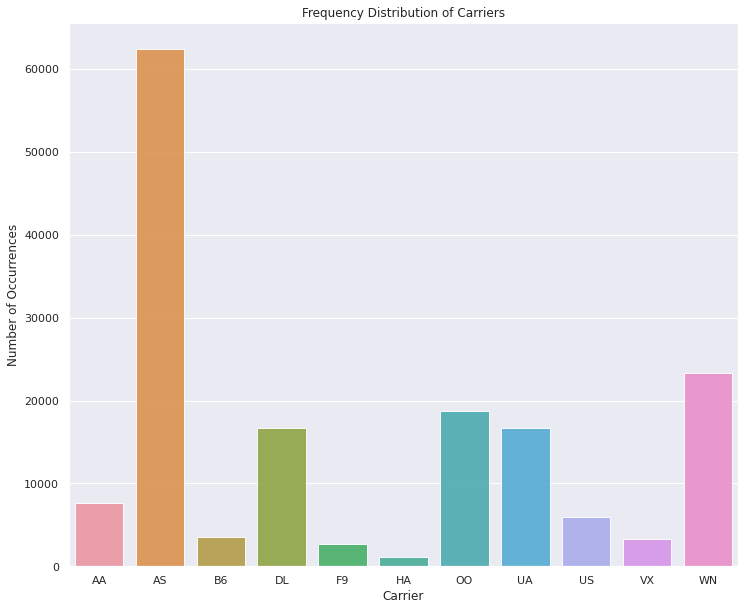

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,10))
carrier_count = cat_df_flights['carrier'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()

How do we order the data? We can `sort_values` in the dataframe, but this doesn't give us exactly what we want to display in the plot:

In [3]:
cat_df_flights.sort_values('carrier')

,carrier,tailnum,origin,dest
105664,AA,N5EKAA,SEA,DFW
132806,AA,N3CRAA,PDX,ORD
13108,AA,N3FXAA,SEA,JFK
38855,AA,N3BHAA,SEA,JFK
38853,AA,N3BMAA,SEA,DFW
...,...,...,...,...
113048,WN,N218WN,SEA,PHX
113055,WN,N375SW,PDX,OAK
113056,WN,N717SA,SEA,LAS
113065,WN,N918WN,SEA,DEN


We can also sort by unique `value_counts` (from the documentation): The resulting object will be in descending order so that the first element is the most frequently-occurring element. 

In [4]:
cat_df_flights['carrier'].value_counts()

AS    62460
WN    23355
OO    18710
DL    16716
UA    16671
AA     7586
US     5946
B6     3540
VX     3272
F9     2698
HA     1095
Name: carrier, dtype: int64

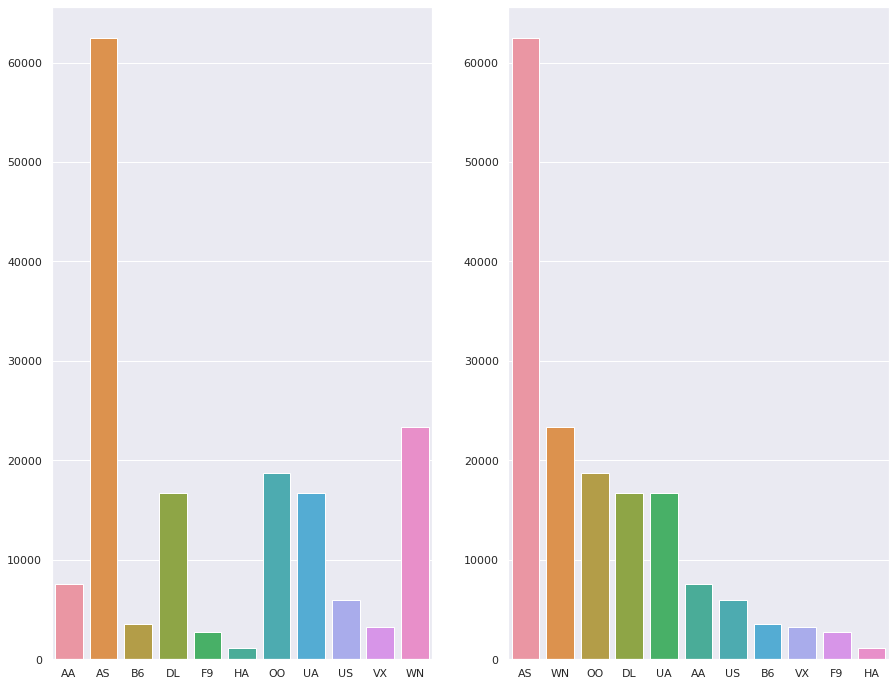

In [5]:
fig,ax = plt.subplots(1, 2, figsize=(15,12))
sns.barplot(x = carrier_count.index, y = carrier_count.values, ax=ax[0])
sns.barplot(x = carrier_count.index, y = carrier_count.values, order=carrier_count.index, ax=ax[1])
fig.show()

### Multivariate analysis - Categorical data

Now, let's say you want to calculate the number of flights for each carrier from each origin places, you can use the .groupby() and .count() methods on your DataFrame to do so:

In [6]:
cat_df_flights.groupby(['origin','carrier']).count()

tailnum   dest
origin carrier                
PDX    AA          2187   2187
       AS         12844  12844
       B6          1287   1287
       DL          5168   5168
       F9          1362   1362
       HA           365    365
       OO          9841   9841
       UA          6061   6061
       US          2361   2361
       VX           666    666
       WN         11193  11193
SEA    AA          5399   5399
       AS         49616  49616
       B6          2253   2253
       DL         11548  11548
       F9          1336   1336
       HA           730    730
       OO          8869   8869
       UA         10610  10610
       US          3585   3585
       VX          2606   2606
       WN         12162  12162

We may wish to compute a heatmap to describe interactions between two variables, for example, to understand the number of flights from origin to destination:

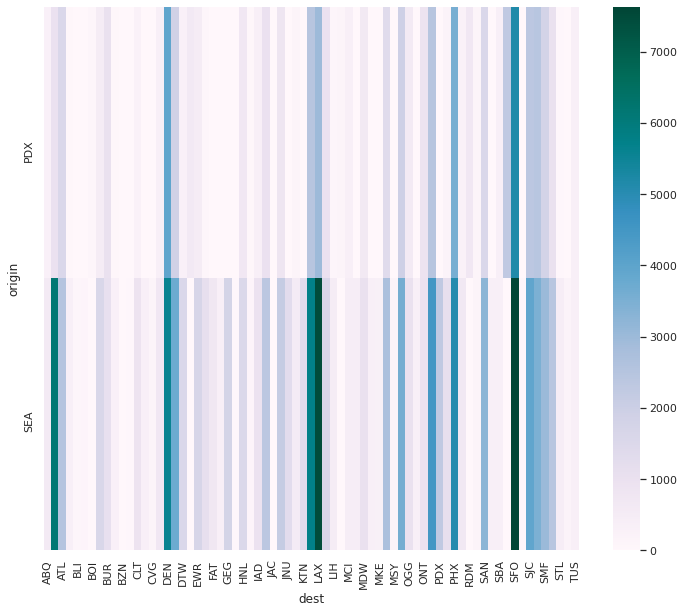

In [7]:
plt.figure(figsize=(12,10))
orig_dest = cat_df_flights.groupby(["origin", "dest"]).size()
orig_dest = orig_dest.reset_index(name="count")
# Pivot the dataframe to create a [origin x dest] matrix containing counts
sns.heatmap(orig_dest.pivot("origin", "dest", "count"), annot=False, cmap="PuBuGn")

From this, we can perform a comparative analysis across the two origin airports, noting that Portland International (PDX) has fewer flights that Seattle Tacoma (SEA), but the popular destinations for each airport are broadly equivalent.

### Univariate analysis - Numerical data

We are now going to explore the numerical data values. We will first compute summary statistics of all the fields.

In [8]:
df_flights.describe()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
count,162049.0,162049.000000,162049.000000,161192.000000,161192.000000,161061.000000,160748.000000,162049.000000,160748.000000,162049.000000,161192.000000,161192.000000
mean,2014.0,6.605027,15.749890,1278.283755,6.133859,1482.501282,2.240868,1357.356725,152.588511,1204.514634,12.479515,30.332244
std,0.0,3.324399,8.789417,522.583793,29.112035,523.958781,31.191037,1495.271031,72.547469,653.150062,5.232476,18.061569
min,2014.0,1.000000,1.000000,1.000000,-37.000000,1.000000,-67.000000,2.000000,18.000000,93.000000,0.000000,0.000000
25%,2014.0,4.000000,8.000000,831.000000,-5.000000,1127.000000,-12.000000,408.000000,103.000000,689.000000,8.000000,14.000000
50%,2014.0,7.000000,16.000000,1217.000000,-2.000000,1517.000000,-4.000000,694.000000,129.000000,991.000000,12.000000,30.000000
75%,2014.0,9.000000,23.000000,1721.000000,5.000000,1918.000000,7.000000,1726.000000,199.000000,1660.000000,17.000000,47.000000
max,2014.0,12.000000,31.000000,2400.000000,1553.000000,2400.000000,1539.000000,6527.000000,422.000000,2724.000000,24.000000,59.000000


Notice how the .describe() function automatically removes the non-numerical variables. We can select the numerical values as follows:

In [9]:
df_num = df_flights.select_dtypes(include = ['float64','int64']).copy()
df_num.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
0,2014,1,1,1.0,96.0,235.0,70.0,145,194.0,1542,0.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,1830,252.0,2279,0.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,1609,201.0,1825,0.0,8.0
3,2014,1,1,28.0,-2.0,800.0,-23.0,466,251.0,2282,0.0,28.0
4,2014,1,1,34.0,44.0,325.0,43.0,121,201.0,1448,0.0,34.0


Now lets plot a histogram of each of these variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff826682908>,
      dtype=object)

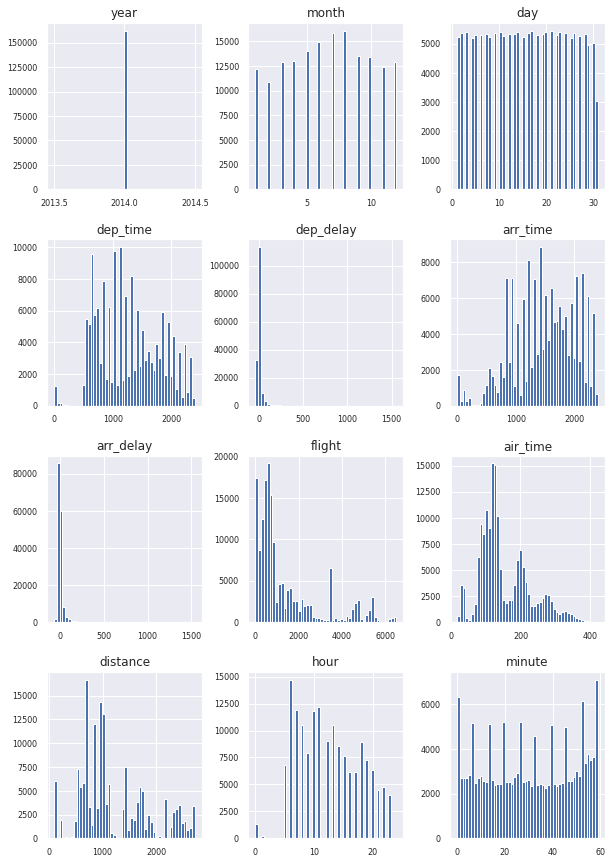

In [10]:
df_num.hist(figsize=(10, 15), bins=50, xlabelsize=8, ylabelsize=8)

In [11]:
df_flights['arr_delay'].describe()

count    160748.000000
mean          2.240868
std          31.191037
min         -67.000000
25%         -12.000000
50%          -4.000000
75%           7.000000
max        1539.000000
Name: arr_delay, dtype: float64

In [12]:
mean = df_flights['arr_delay'].mean()
median = df_flights['arr_delay'].median()
print(mean,median)

2.2408676935327345 -4.0


We will now use matplotlib's subplot command again in order to stack multiple plots:

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


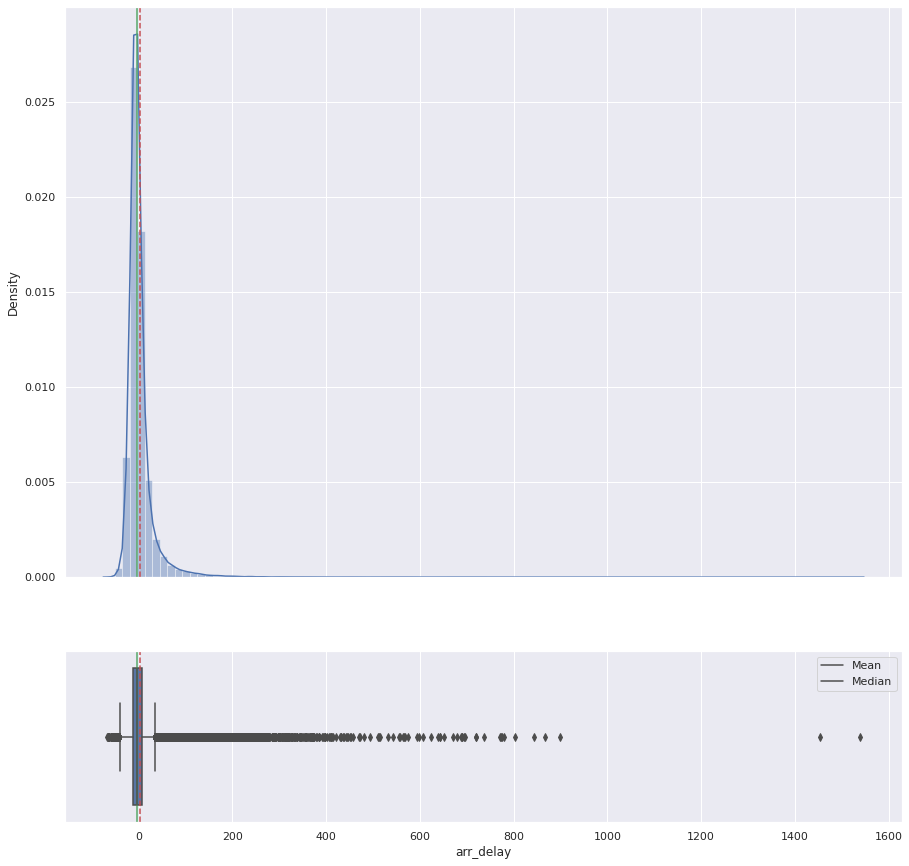

In [13]:
f1, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (1, 0.3)}, figsize=(15, 15))

# subplot 1
sns.distplot(df_flights['arr_delay'], bins=100, hist_kws={'alpha': 0.4}, ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')


# subplot 2
sns.boxplot(df_flights['arr_delay'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

plt.legend({'Mean': mean,'Median': median})

plt.show()

In the above diagram, it is clear to see that the values >1400 are anomolous. These are significant distances from the mean. Why do these anomalous values occur? What should we do about them? Are we likely to see them again?

In [14]:
df_flights['distance'].describe()

count    162049.000000
mean       1204.514634
std         653.150062
min          93.000000
25%         689.000000
50%         991.000000
75%        1660.000000
max        2724.000000
Name: distance, dtype: float64

In [15]:
mean_dist = df_flights['distance'].mean()
median_dist = df_flights['distance'].median()
print(mean_dist,median_dist)

1204.5146344624156 991.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


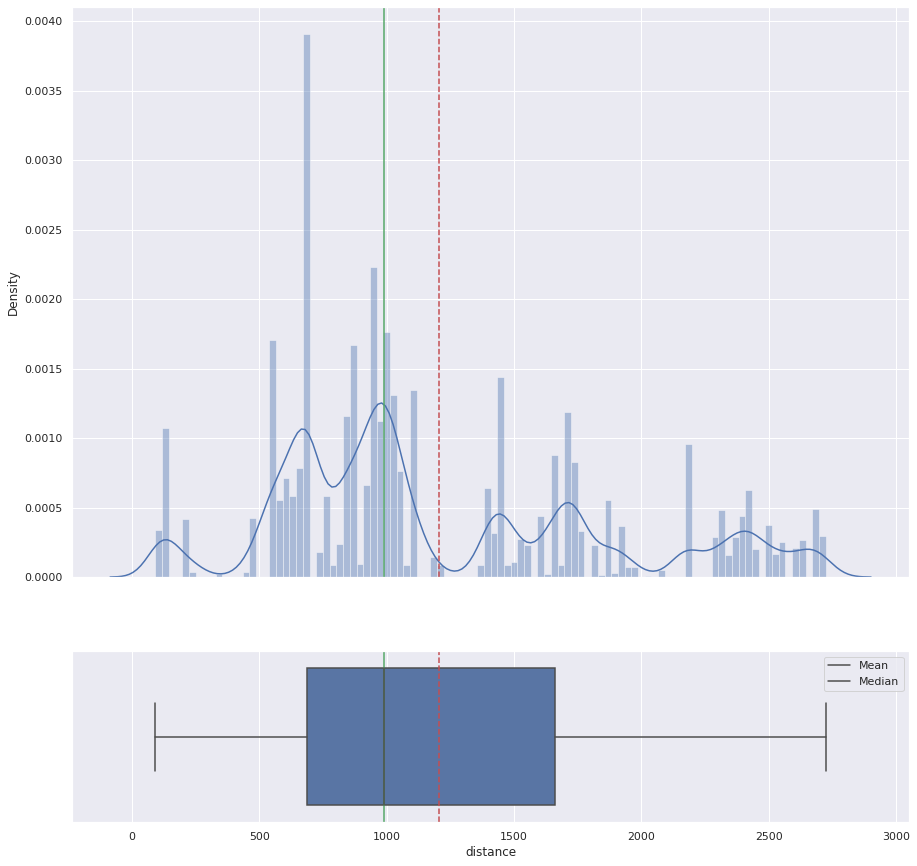

In [16]:
f1, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (1, 0.3)}, figsize=(15, 15))

# subplot 1
sns.distplot(df_flights['distance'], bins=100, hist_kws={'alpha': 0.4}, ax=ax_hist)
ax_hist.axvline(mean_dist, color='r', linestyle='--')
ax_hist.axvline(median_dist, color='g', linestyle='-')


# subplot 2
sns.boxplot(df_flights['distance'], ax=ax_box)
ax_box.axvline(mean_dist, color='r', linestyle='--')
ax_box.axvline(median_dist, color='g', linestyle='-')

plt.legend({'Mean': mean,'Median': median})

plt.show()

What does this distribution tell us?

### Multivariate analysis - Numerical data

Finally, we should look at correlations between variables, and explore how variables interact with each other in a pairwise manner, that is, how tightly coupled they are.

In [17]:
z = 'hour'

In [18]:
df_num_corr = df_num.corr()[z][:-1]
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with the query variable (z):\n{}".format(len(golden_features_list), golden_features_list))

There is 2 strongly correlated values with the query variable (z):
hour        1.000000
dep_time    0.999404
Name: hour, dtype: float64


<Figure size 1080x1440 with 0 Axes>

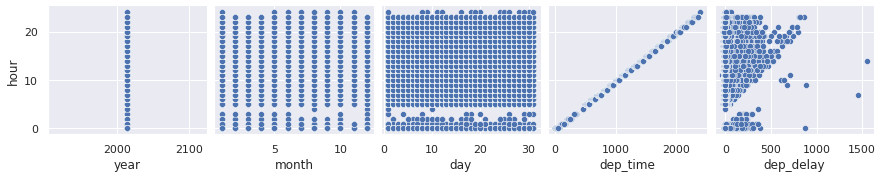

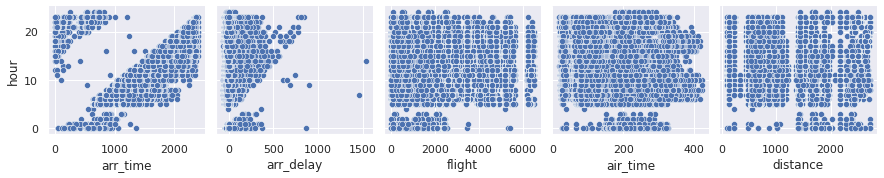

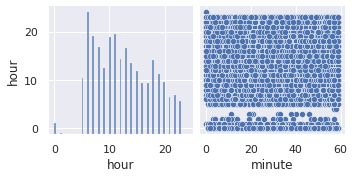

In [19]:
plt.figure(figsize=(15,20))
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=[z])

## COVID-19 case study (continued)

Let's reload the data (reference https://towardsdatascience.com/covid-19-data-processing-58aaa3663f6):

In [20]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=7926dea58f83377e7afa489f0c946c40b8b0d62486324590e3c8d19ec4894c6a
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [21]:
import wget
urls = [
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
]
for link in urls:
  wget.download(link)

confirmed_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('time_series_covid19_recovered_global.csv')

In [22]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,51405,51526,51526,51526,51526,53011,53105,53105,53207,53332,53400,53489,53538,53584,53584,53775,53831,53938,53984,54062,54141,54278,54403,54483,54559,54595,54672,54750,54854,54891,54939,55008,55023,55059,55121,55174,55231,55265,55330,55335
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,57727,58316,58316,58991,59438,59623,60283,61008,61705,62378,63033,63595,63971,64627,65334,65994,66635,67216,67690,67982,68568,69238,69916,70655,71441,72274,72812,73691,74567,75454,76350,77251,78127,78992,79934,80941,81993,83082,84212,85336
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,99311,99610,99897,100159,100408,100645,100873,101120,101382,101657,101913,102144,102369,102641,102860,103127,103381,103611,103833,104092,104341,104606,104852,105124,105369,105596,105854,106097,106359,106610,106887,107122,107339,107578,107841,108116,108381,108629,108629,109088
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7983,8049,8117,8166,8192,8249,8308,8348,8348,8489,8586,8586,8586,8682,8818,8868,8946,9038,9083,9083,9194,9308,9379,9416,9499,9549,9596,9638,9716,9779,9837,9885,9937,9972,10017,10070,10137,10172,10206,10251
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,17433,17553,17568,17608,17642,17684,17756,17864,17974,18066,18156,18193,18254,18343,18425,18613,18679,18765,18875,18926,19011,19093,19177,19269,19367,19399,19476,19553,19580,19672,19723,19782,19796,19829,19900,19937,19996,20030,20062,20086


Now, it's much more convenient to have a single table of data, so that we can more easily perform the univariate and multivariate analyses. First, lets `melt` the data. (See https://pandas.pydata.org/docs/reference/api/pandas.melt.html)

In [23]:
dates = confirmed_df.columns[4:]
confirmed_df_long = confirmed_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Confirmed'
)
deaths_df_long = deaths_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Deaths'
)
recovered_df_long = recovered_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Recovered'
)

confirmed_df.head()
confirmed_df_long.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


Canada is known to have messy data in the recovered table, so we need to remove this from the analysis:

In [24]:
recovered_df_long = recovered_df_long[recovered_df_long['Country/Region']!='Canada']

Now we'll merge these tables, so that we have the full table (DataFrame):

In [25]:
# Merging confirmed_df_long and deaths_df_long
full_table = confirmed_df_long.merge(
  right=deaths_df_long, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)
# Merging full_table and recovered_df_long
full_table = full_table.merge(
  right=recovered_df_long, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)

In [26]:
full_table.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0,0,0.0
1,NaN,Albania,41.15330,20.168300,1/22/20,0,0,0.0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0,0,0.0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0,0,0.0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0,0,0.0


Let's convert the `Date` field to datetime representations:

In [27]:
full_table['Date'] = pd.to_datetime(full_table['Date'])

Any missing data?

In [28]:
full_table.isna().sum()

Province/State    72387
Country/Region        0
Lat                 383
Long                383
Date                  0
Confirmed             0
Deaths                0
Recovered          8043
dtype: int64

Default missing values to `0`:

In [29]:
full_table['Recovered'] = full_table['Recovered'].fillna(0)

The data are known to contain cruise liners. Let's remove those from the analysis, to keep it focussed on country level data:

In [30]:
ship_rows = full_table['Province/State'].str.contains('Grand Princess') | full_table['Province/State'].str.contains('Diamond Princess') | full_table['Country/Region'].str.contains('Diamond Princess') | full_table['Country/Region'].str.contains('MS Zaandam')

In [31]:
full_table = full_table[~(ship_rows)]

Finally, we'll create an additional column of data, so we can see how many active cases there are at any point in time.

In [32]:
# Active Case = confirmed - deaths - recovered
full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']

Now view the final `full_table`:

In [33]:
full_table.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0.0,0.0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0.0,0.0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0.0,0.0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0.0,0.0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0.0,0.0


Next, let’s aggregate data into Country/Region wise and group them by Date and Country/Region.

In [34]:
full_grouped = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [35]:
full_grouped.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active
0,2020-01-22,Afghanistan,0,0,0.0,0.0
1,2020-01-22,Albania,0,0,0.0,0.0
2,2020-01-22,Algeria,0,0,0.0,0.0
3,2020-01-22,Andorra,0,0,0.0,0.0
4,2020-01-22,Angola,0,0,0.0,0.0


To finish, we'll plot the UK related data:

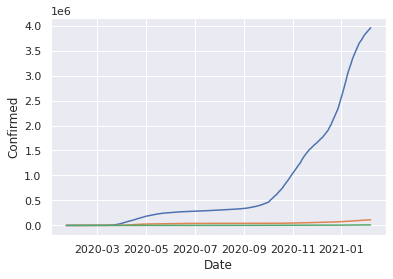

In [36]:
uk = full_grouped[full_grouped['Country/Region'] == 'United Kingdom']
sns.lineplot(x="Date", y="Confirmed", data=uk)
sns.lineplot(x="Date", y="Deaths", data=uk)
sns.lineplot(x="Date", y="Recovered", data=uk)

***
Mandatory exercises:

- [ ] Replicate all of the code in this notebook.
- [ ] Produce a plot of the COVID-19 data from a country other than the UK. What do you notice (if anything) about the difference with the UK?
- [ ] Read pages 1-22 of the following: https://www.stat.cmu.edu/~hseltman/309/Book/chapter4.pdf

Optional reading:
- [ ] Read: https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python
- [ ] Read Sections 1-4 of https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python